KNN stands for k-nearest neighbors, which is a popular supervised machine learning algorithm used for classification and regression tasks. It is a non-parametric algorithm that makes predictions based on the similarity of the input data to its k nearest neighbors in the training dataset.

Here's how the KNN algorithm works:

1. Training Phase: The algorithm stores the training dataset, which consists of labeled examples. Each example is a data point with multiple features and a corresponding class label or output value.

2. Prediction Phase:
   a. Input: When given a new, unlabeled data point for prediction, the algorithm takes the features of the input data point as input.
   b. Distance Calculation: The algorithm calculates the distance between the input data point and all the data points in the training dataset. The most common distance metric used is the Euclidean distance, but other metrics like Manhattan distance or cosine similarity can also be used.
   c. Nearest Neighbors: The algorithm selects the k nearest neighbors based on the calculated distances. The value of k is a user-defined parameter.
   d. Voting or Weighted Averaging: For classification tasks, the algorithm determines the class of the input data point by majority voting among its k nearest neighbors. Each neighbor's vote is weighted equally. For regression tasks, the algorithm predicts the output value of the input data point by taking the average or weighted average of the output values of its k nearest neighbors.
   e. Output: The algorithm outputs the predicted class label or output value for the input data point.

The choice of the value of k is crucial in KNN. A small value of k may result in overfitting, whereas a large value of k may introduce noise from unrelated neighbors. The optimal value of k depends on the dataset and can be determined using techniques like cross-validation.

KNN is a simple and intuitive algorithm but can be computationally expensive for large datasets, as it requires calculating distances for every data point in the training set. Additionally, KNN is sensitive to the scale of the features, so it's often necessary to normalize or standardize the data before applying the algorithm.

Overall, KNN is a versatile algorithm used for both classification and regression tasks, and it finds applications in various domains such as image recognition, recommendation systems, and anomaly detection.

#How It Works

KNN works in three main steps: (1) calculating the distance between the query point and each training point, (2) selecting the k-nearest neighbors to the query point, and (3) predicting the class or value of the query point based on the majority class or the mean value of the neighbors, respectively. The choice of the distance metric and the value of k are important parameters in the KNN algorithm.

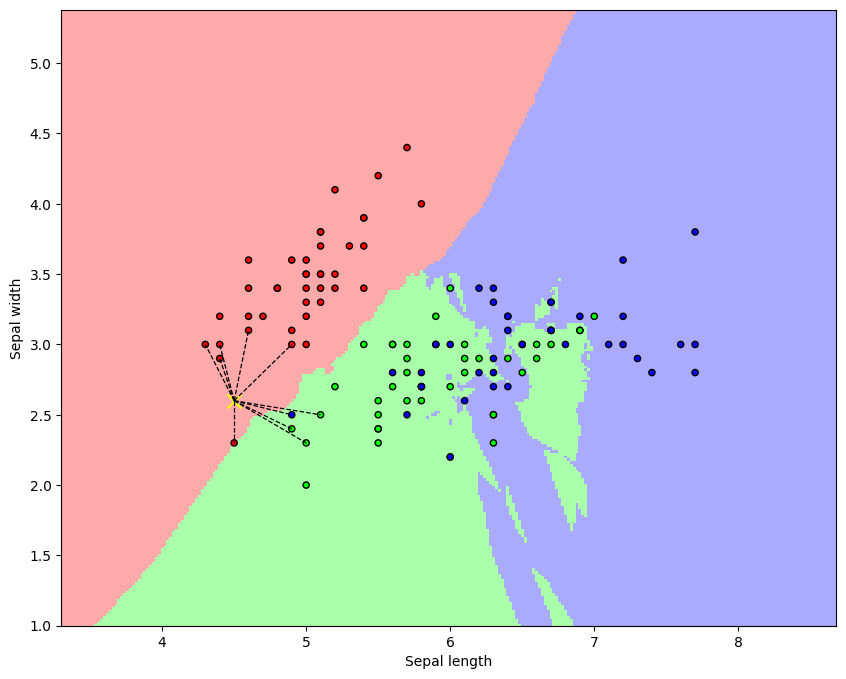
Example of KNN with k=10 (using the iris dataset). The dotted lines represent the neighbors that were used in the classification of the new query point.
There are many different distance metrics you can choose from, with the most common being Euclidean distance. Other possible distance metrics include Manhattan distance, Minkowski distance, Hamming distance, and Cosine distance. These distance metrics define the decision boundaries for the corresponding partitions of data. The “right” distance metric to choose depends on the problem at hand. 

With respect to choosing the appropriate value of k, this will largely depend on the input dataset. The k value determines the number of data points that the algorithm considers when predicting the value/label of a new data point. A larger value of k considers more data points, resulting in a smoother decision boundary, but may lead to underfitting. A smaller value of k considers fewer data points, resulting in a more complex decision boundary and may lead to overfitting. We dive deeper into choosing the value of k in the section on implementation KNN algorithm below. 

**About Titanic**
=================

RMS Titanic, during her maiden voyage on April 15, 1912, sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. The tragedy is considered one of the most infamous shipwrecks in history and led to better safety guidelines for ships.

**I have approached this project through the following process:**

 1. Understand different features in the training dataset
 2. Clean the features
 3. Remove outliers
 4. Find relation between different features and survival 
 5. Find the best features using SelectKBest (to get an optimal fit between bias and variance)
 6. Train and fit the model
 7. Predict the scores using KNearestNeighbors
 8. Check Accuracy
 9. Predict Survival values for test.csv
 10. Create final file for submission



In [1]:
# Importing related Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv

# Importing SKLearn clssifiers and libraries
from sklearn.preprocessing import MinMaxScaler  #(Normalisation)
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV



In [2]:
# Importing the training dataset

df_train = pd.read_csv(r'C:\Users\DELL\Desktop\New folder\train (2).csv')

#  1. Understand different features in the training dataset

The training dataset, imported as a Pandas dataframe (train_df) has 891 rows with 12 columns/features, with some of the details mentioned below: 

In [3]:
df_train.head() #Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.shape

(891, 12)

In [5]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# 2. Clean the features

I am not interested the following features, as I believe they do not hold any logical reason, why the passenger will survive or not :

 1. Name
 2. Ticket 
 3. Fare 
 4. Cabin

Further, in case I find correlation between them, I believe it will not be causation (Ticket, Fare, and Cabin can be highly correlated to Passenger Class)

Therefore, I have dropped the above-mentioned features from the training dataset


In [6]:
df_train = df_train.drop('Name', axis=1,)
df_train = df_train.drop('Ticket', axis=1,)
df_train = df_train.drop('Fare', axis=1,)
df_train = df_train.drop('Cabin', axis=1,)

In [7]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Embarked        object
dtype: object

I have created another column/feature for number of people in the family (Family) by adding SibSp, Parch, and 1 (for the passenger). 

Further, I have dropped the SibSp and Parch features



In [8]:
df_train['Family'] = df_train['SibSp'] + df_train['Parch'] + 1

In [9]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Family
0,1,0,3,male,22.0,1,0,S,2
1,2,1,1,female,38.0,1,0,C,2
2,3,1,3,female,26.0,0,0,S,1
3,4,1,1,female,35.0,1,0,S,2
4,5,0,3,male,35.0,0,0,S,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,S,1
887,888,1,1,female,19.0,0,0,S,1
888,889,0,3,female,NaN,1,2,S,4
889,890,1,1,male,26.0,0,0,C,1


In [10]:
df_train = df_train.drop('SibSp', axis=1,)
df_train = df_train.drop('Parch', axis=1,)

I also want to check a hypothesis that while saving passengers minors were given preference over adults. 

Therefore, I would be creating a new column to differentiate minors from adults. However, I will first check the Age statistics of passengers.

In [11]:
df_train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [12]:
# pip install pandas-profiling
import pandas as pd
from pandas_profiling import ProfileReport

C:\Users\DELL\AppData\Local\Temp\ipykernel_11832\400408399.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [13]:
profile=ProfileReport(df_train)

In [14]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
profile.to_file('reportoftitanic.html')

Since the column Age contains several NaN values, I will first clear those values in next section, and then create the new column.

#  3. Remove outliers

Now, I want to check which features have how many NaN cells

In [16]:
feat_list = list(df_train.columns.values)

for feat in feat_list:
    print (feat,": ",sum(pd.isnull(df_train[feat])))

We have 177 NaN in Age and 2 in Embarked.

 1. For Age, I have filled the NaN with median age
 2. For Embarked, I have filled the NaN with port of embarkation with maximum frequency

In [17]:
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].median())

In [18]:
df_train["Embarked"].mode()

In [19]:
df_train["Embarked"] = df_train["Embarked"].fillna("S")

In [20]:
# re-checking NaNs

feat_list = list(df_train.columns.values)

for feat in feat_list:
    print (feat,": ",sum(pd.isnull(df_train[feat])))

In [21]:
# Checking statistics of Age column
df_train["Age"].describe()

As discussed before, I have now categorized the Age feature into following two categories:

 1. Passengers who were minors (0)
 2. passengers who were adults (1)

I have created a new column named Adult, and assigned value 1 to passengers who were 18 years and above, and 0 to passengers who were minors. 

This is done to check the hypothesis that more minors survived, as compared to adults

In [22]:
df_train["Adult"] = 0

In [23]:
df_train["Adult"][df_train["Age"] >= 18] = 1

In [24]:
# performing a sanitory check to confirm

### Number of passengers with age >= 18 - Age column
print ("Passengers more than 18 yrs old: ",str(len(df_train[df_train["Age"] >= 18])))

### Number of adult passengers  - Adult column

print ("Number of Adults: ",str(len(df_train[df_train["Adult"] >= 1])))

In [25]:
### Dropping the Age column

df_train = df_train.drop('Age', axis=1)

In [26]:
df_train.head()

#  4. Find relation among different features and survival

In order to find relation between any two features, I have used Pivot Tables. I have used a function to save myself from code redundancy. 

In [27]:
import pandas as pd
data={
    'Category':['A','B','A','B','A','B'],
    'VALUE1':[10,20,30,40,50,60],
    'VALUE2':[100,200,300,400,500,600]
}
df=pd.DataFrame(data)
df

In [29]:
pivot=df.pivot_table(values=['VALUE1','VALUE2'],index='Category',aggfunc='sum')
print(pivot)

          VALUE1  VALUE2
Category                
A             90     900
B            120    1200


In [40]:
### I have created a function, which given two parameters, 
### creates a pivot table and a bar chart to show their relationship 

def make_pivot (param1, param2):
    df_slice = df_train[[param1, param2, 'PassengerId']]
    slice_pivot = df_slice.pivot_table(index=[param1], columns=[param2],aggfunc=np.size, fill_value=0)
    
    p_chart = slice_pivot.plot.bar()
    for p in p_chart.patches:
        p_chart.annotate(str(p.get_height()), (p.get_x() * 1.09, p.get_height() * 1.01))
    
    return slice_pivot
    return p_chart




**Relation between Survival and Passenger Class**

PassengerId         
Pclass             1   2    3
Survived                     
0                 80  97  372
1                136  87  119

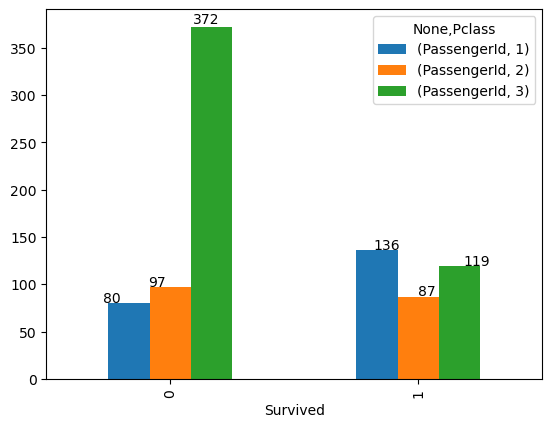

In [41]:
make_pivot("Survived","Pclass")

**Relation between Survival and Passenger Sex**

PassengerId     
Sex           female male
Survived                 
0                 81  468
1                233  109

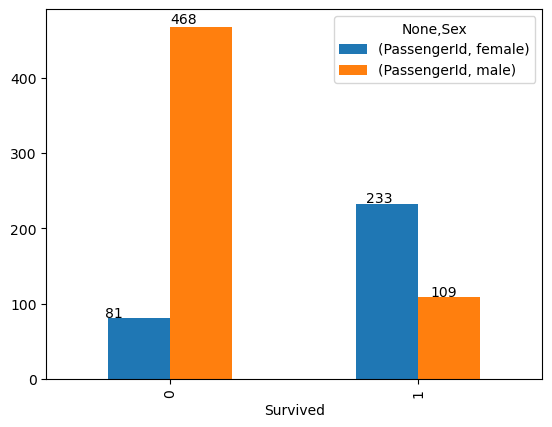

In [45]:
make_pivot("Survived","Sex")

**Relation between Survival and Port of Embarkation**

PassengerId         
Embarked           C   Q    S
Survived                     
0                 75  47  427
1                 93  30  219

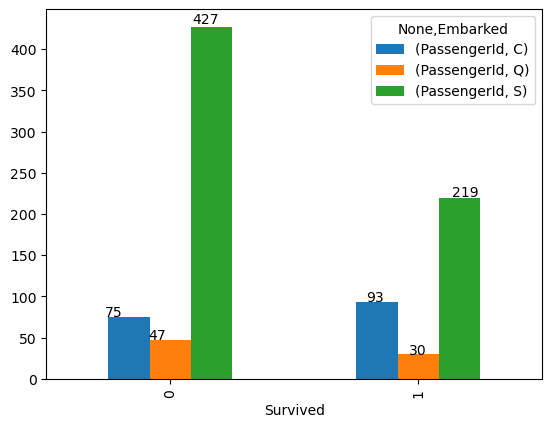

In [46]:
make_pivot("Survived","Embarked")

**Relation between Survival and Family Members On-board**

PassengerId                             
Family            1   2   3   4   5   6  7  8  11
Survived                                         
0                374  72  43   8  12  19  8  6  7
1                163  89  59  21   3   3  4  0  0

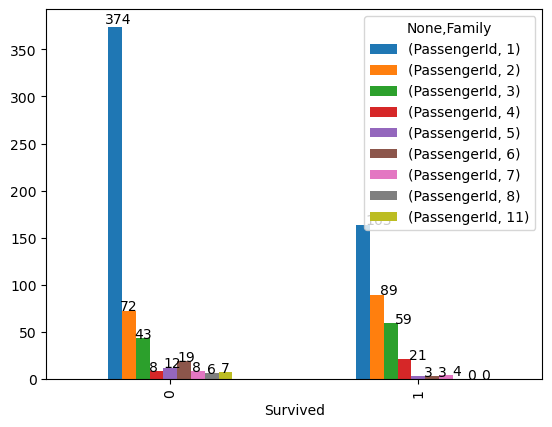

In [47]:
make_pivot("Survived","Family")

**Relation between Survival and Passenger Age (Adult Status)**


PassengerId     
Adult              0    1
Survived                 
0                 52  497
1                 61  281

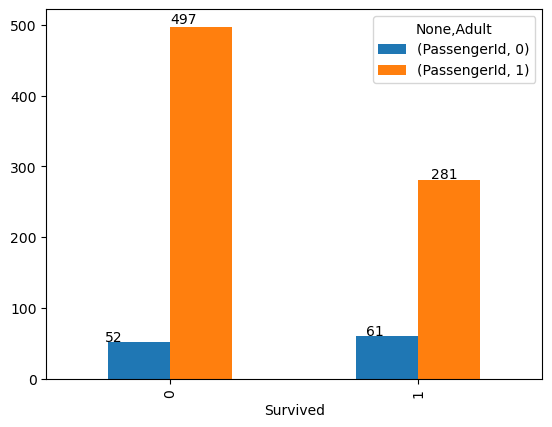

In [48]:
make_pivot("Survived","Adult")

*It does not prove my hypothesis that minors were given preference over adults while saving passengers*

#  5. Find the best features using SelectKBest (to get an optimal fit between bias and variance)

From the df_train dataframe, I have created a dataframe X, which contains all the features, and a numpy array y, which contains values of survived passengers

In [42]:
df1 = df_train.filter(['Pclass','Sex','Embarked','Family','Adult'], axis=1)

X = df1

In [43]:
df2 = df_train['Survived']

y = df2

in order to run SelectKBest, I have converted values in "Embarked"  and "Sex" to numeric

In [44]:
X["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [45]:
X["Embarked"][df_train["Embarked"] == "S"] = 1
X["Embarked"][df_train["Embarked"] == "C"] = 2
X["Embarked"][df_train["Embarked"] == "Q"] = 3

C:\Users\DELL\AppData\Local\Temp\ipykernel_11832\4178034214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Embarked"][df_train["Embarked"] == "S"] = 1
C:\Users\DELL\AppData\Local\Temp\ipykernel_11832\4178034214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Embarked"][df_train["Embarked"] == "C"] = 2
C:\Users\DELL\AppData\Local\Temp\ipykernel_11832\4178034214.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Embark

In [46]:
X["Sex"][df_train["Sex"] == "male"] = 1
X["Sex"][df_train["Sex"] == "female"] = 2


C:\Users\DELL\AppData\Local\Temp\ipykernel_11832\3711890699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex"][df_train["Sex"] == "male"] = 1
C:\Users\DELL\AppData\Local\Temp\ipykernel_11832\3711890699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex"][df_train["Sex"] == "female"] = 2


In [51]:
# using SelectKBest to get scores of all features of the DataFrame

test = SelectKBest(f_classif, k='all')
test_fit = test.fit(X, y)
feat_score = test_fit.scores_.round(2)
p_values = -np.log10(test_fit.pvalues_).round(2)

In [52]:
p_values#AFTER LOG

array([24.6 , 68.85,  2.85,  0.21,  3.59])

In [58]:
test_fit.pvalues_#WITHOUT LOG

array([2.53704739e-25, 1.40606613e-69, 1.40831242e-03, 6.19891122e-01,
       2.54797678e-04])

In [59]:
feature_list = list(X.columns.values)
selected_features = test.get_support([test_fit])
selected_features

array([0, 1, 2, 3, 4], dtype=int64)

In [60]:
temp_list = [ ]

for i in selected_features:
    temp_list.append({'Feature':feature_list[i], 'P_Value':p_values[i], 'Score': feat_score[i]  })
    
feat_select = pd.DataFrame(temp_list)

In [61]:
temp_list

[{'Feature': 'Pclass', 'P_Value': 24.6, 'Score': 115.03},
 {'Feature': 'Sex', 'P_Value': 68.85, 'Score': 372.41},
 {'Feature': 'Embarked', 'P_Value': 2.85, 'Score': 10.26},
 {'Feature': 'Family', 'P_Value': 0.21, 'Score': 0.25},
 {'Feature': 'Adult', 'P_Value': 3.59, 'Score': 13.49}]

In [62]:
feat_select = feat_select.sort_values(by='Score', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

In [63]:
feat_select = feat_select.set_index('Feature')

In [64]:
feat_select

,P_Value,Score
Feature,,
Sex,68.85,372.41
Pclass,24.60,115.03
Adult,3.59,13.49
Embarked,2.85,10.26
Family,0.21,0.25


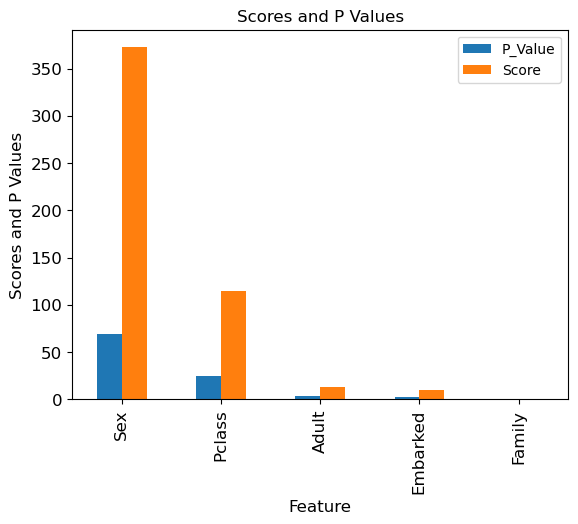

In [65]:
ax = feat_select[['P_Value','Score']].plot(kind='bar', title ="Scores and P Values",  legend=True, fontsize=12)
ax.set_xlabel("Feature", fontsize=12)
ax.set_ylabel("Scores and P Values", fontsize=12)
plt.show()

**Based on the score above, I have considered top-3 features - Sex, Pclass and Adult - as my final features**

In [66]:
### Dropping the Embarked and Family column

X = X.drop('Embarked', axis=1,)
X = X.drop('Family', axis=1,)


In [67]:
X.head()

,Pclass,Sex,Adult
0,3,1,1
1,1,2,1
2,3,2,1
3,1,2,1
4,3,1,1


#  6. Train and fit the model

Since the test.csv does not have "Survived" column, I have split the training dataset to do in-house accuracy and precision testing, before submitting the entry 

In [68]:
features_train, features_test, labels_train, labels_test = \
    train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
features_train.shape

(623, 3)

In [70]:
features_test.shape

(268, 3)

In [71]:
labels_train.shape

(623,)

In [72]:
labels_test.shape

(268,)

# 7. Predict the scores using KNearestNeighbors

**Using K Nearest Neighbors (KNN) with GridSearchCV**

In [77]:
knn = KNeighborsClassifier( )
k_range = list(range(1,10))
weights_options = ['uniform','distance']
k_grid = dict(n_neighbors=k_range, weights = weights_options)
grid = GridSearchCV(knn, k_grid, cv=10, scoring = 'precision')
grid.fit(features_train, labels_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             scoring='precision')

In [78]:
print ("Best Score: ",str(grid.best_score_))

Best Score:  0.9399689199689198


In [76]:
print ("Best Parameters: ",str(grid.best_params_))

Best Parameters:  {'n_neighbors': 4, 'weights': 'distance'}


In [77]:
print ("Best Estimators: ",str(grid.best_estimator_))

Best Estimators:  KNeighborsClassifier(n_neighbors=4, weights='distance')


#  8. Check Accuracy

In [79]:
# predicting scores

label_pred = grid.predict(features_test)

In [80]:
# Calculating Accuracy

acc_clf = metrics.accuracy_score(labels_test,label_pred)
print ("classifier's accuracy: ",str(acc_clf) )

classifier's accuracy:  0.7798507462686567


In [81]:
from sklearn.metrics import *

In [82]:
print(classification_report(labels_test,label_pred))

              precision    recall  f1-score   support

           0       0.74      0.97      0.84       157
           1       0.92      0.51      0.66       111

    accuracy                           0.78       268
   macro avg       0.83      0.74      0.75       268
weighted avg       0.81      0.78      0.76       268



In [83]:
# Calculating precision, recall, and fbeta_score
scr_clf = precision_recall_fscore_support(labels_test,label_pred, average='weighted')

print ("classifier's precision: ",str(scr_clf[0])) 
print ("classifier's recall: ",str(scr_clf[1])) 
print ("classifier's fbeta_score: ",str(scr_clf[2])) 

classifier's precision:  0.813033758548317
classifier's recall:  0.7798507462686567
classifier's fbeta_score:  0.7635320982628063


# 9. Predict Survival values for test.csv

Now that I have checked the accuracy, precision and recall, I will predict the scores test.csv and export the final file for submission.

In [84]:
# Importing the testing dataset

df_test = pd.read_csv(r'C:\Users\DELL\Desktop\New folder\test.csv')

In [85]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

I need only the following three features from the dataframe:

 1. Sex
 2. Pclass
 3. Adult (derived from Age)

In [86]:
test_set = df_test[['Pclass', 'Sex', 'Age']].copy()

In [87]:
test_set.columns.values

array(['Pclass', 'Sex', 'Age'], dtype=object)

In [88]:
# checking NaNs

test_list = list(test_set.columns.values)

for test_item in test_list:
    print (test_item,": ",sum(pd.isnull(test_set[test_item])))


Pclass :  0
Sex :  0
Age :  86


In [89]:
# Filling NaN values in Age

test_set["Age"] = test_set["Age"].fillna(test_set["Age"].median())

In [90]:
# Creating the "Adult" column

test_set["Adult"] = 0
test_set["Adult"][test_set["Age"] >= 18] = 1

### Dropping the Age column

test_set = test_set.drop('Age', axis=1,)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2932\15178212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["Adult"][test_set["Age"] >= 18] = 1


In [91]:
# Converting values of column "Sex" to numeric


test_set["Sex"][test_set["Sex"] == "male"] = 1
test_set["Sex"][test_set["Sex"] == "female"] = 2

C:\Users\DELL\AppData\Local\Temp\ipykernel_2932\2630648506.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["Sex"][test_set["Sex"] == "male"] = 1
C:\Users\DELL\AppData\Local\Temp\ipykernel_2932\2630648506.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["Sex"][test_set["Sex"] == "female"] = 2


In [92]:
test_set.head()

,Pclass,Sex,Adult
0,3,1,1
1,3,2,1
2,2,1,1
3,3,1,1
4,3,2,1


In [93]:
# predicting survivals on test set

final_pred = grid.predict(test_set)
final_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [94]:
len(final_pred)

418

# 10. Create final file for submission

In [97]:
df_test['Survived'] = pd.Series(final_pred, index=df_test.index)

In [98]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [99]:
final_df = df_test.filter(['PassengerId','Survived'], axis=1)

In [100]:
final_df.shape

(418, 2)

In [101]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [102]:
final_df['Survived'].value_counts()

0    335
1     83
Name: Survived, dtype: int64

In [103]:
#Exporting predictions as csv
final_df.to_csv(r"C:\Users\DELL\Desktop\New folder\titanic_pred1.csv")